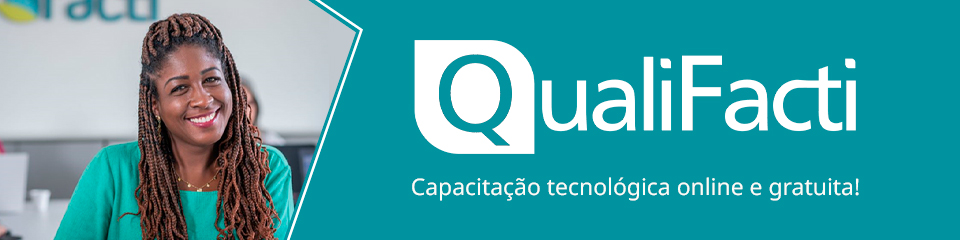

# **Inteligência Artificial aplicada à Visão Computacional**

**Capítulo 6: Visão Computacional aplicada ao reconhecimento de emoções**



<p align="justify">

Todos os direitos reservados à Facti, 2024
<p>

[www.qualifacti.com.br](https://)

---

<p align="justify">
É importante esclarecer que estas atividades não compõem a avaliação e não haverá correção formal por parte dos instrutores; o objetivo é a autoaprendizagem e prática.
<p>

---

# **ETAPA CONCEITUALIZAR**

---

# **Recado importante**


Olá,
<p align="justify">
Como parte do capítulo de <b>reconhecimento de emoções</b>, gostaríamos de ressaltar a importância de realizar as atividades de implementação fornecidas. Estas atividades são cuidadosamente desenhadas para reforçar o conteúdo apresentado.
Lembre-se, a implementação é uma habilidade que se aprimora com a prática. Ao aplicar os conceitos aprendidos, especialmente por meio da escrita e execução de códigos, você ganhará uma compreensão mais profunda e prática dos modelos.
Encorajamos todos a dedicar tempo a essas atividades. Ao fazer isso, você não apenas reforçará o que foi ensinado, mas também desenvolverá as habilidades essenciais de resolução de problemas e depuração de código.

Lembrem-se: não basta apenas aprender, é preciso codificar! O caminho para dominar os modelos começa com a experiência prática.

Atenciosamente,

Júlio e Marcelo
<p>

---

# **Atividade de experimentação 67**

Testando o modelo do detector de emoções pela webcam

## Importando as bibliotecas

In [ ]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile
%tensorflow_version 2.x
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

## Conectando com o Drive e acessando os arquivos

In [ ]:
# Conectando o Colab ao Google Drive
# Realize o dowload da pasta Material_complementar_reconhecimento_emocoes.zip do Google Sala de Aula e transfira-a para o seu Google Drive
# Localize o caminho da pasta no menu Arquivos, no menu lateral esquerdo
from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/Material_complementar_reconhecimento_emocoes.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close

Mounted at /content/gdrive


<bound method ZipFile.close of <zipfile.ZipFile filename='/content/gdrive/MyDrive/Material_complementar_reconhecimento_emocoes.zip' mode='r'>>

## Testando a foto capturada da webcam

In [ ]:
# Script para visualização de vídeo pela webcam
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
from PIL import Image

VIDEO_HTML = """
<video autoplay
 width=%d height=%d style='cursor: pointer;'></video>
<script>

var video = document.querySelector('video')

navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)

var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = w
    canvas.height = h
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def tirar_foto(filename='photo.jpg', quality=2, size=(400,300)):
  display(HTML(VIDEO_HTML % (size[0],size[1],quality)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))

**Capturando a foto**

In [ ]:
# Clique na imagem da webcam para tirar uma foto
imagem = tirar_foto()
# Inverte a ordem dos canais (utilizar caso a imagem capturada fique com cores invertidas)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
cv2_imshow(imagem)
cv2.imwrite("testecaptura.jpg",imagem)

In [ ]:
# Utilize um haarcasdade pré treinado para o reconhecimento facial
# Utilize um modelo pré treinado para o reconhecimento das emoções
cascade_faces = '/content/haarcascade_frontalface_default.xml'
caminho_modelo = '/content/modelo_01_expressoes.h5'
face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes = load_model(caminho_modelo, compile=False)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Carrega o modelo
face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes = load_model(caminho_modelo, compile=False)
# Classifica cada uma das categorias das expressões
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]

original = imagem.copy()
faces = face_detection.detectMultiScale(original,scaleFactor=1.1,minNeighbors=3,minSize=(20,20))
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

if len(faces) > 0:
    for (fX, fY, fW, fH) in faces:
      roi = cinza[fY:fY + fH, fX:fX + fW]
      roi = cv2.resize(roi, (48, 48))
      roi = roi.astype("float") / 255.0
      roi = img_to_array(roi)
      roi = np.expand_dims(roi, axis=0)
      preds = classificador_emocoes.predict(roi)[0]
      print(preds)
      emotion_probability = np.max(preds)
      label = expressoes[preds.argmax()]
      cv2.putText(original, label, (fX, fY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 255), 2, cv2.LINE_AA)
      cv2.rectangle(original, (fX, fY), (fX + fW, fY + fH),(0, 0, 255), 2)
else:
    print('Nenhuma face detectada')


cv2_imshow(original)

probabilidades = np.ones((250, 300, 3), dtype="uint8") * 255
# Mostra gráfico apenas se detectou uma face
if len(faces) == 2:
  for (i, (emotion, prob)) in enumerate(zip(expressoes, preds)):
      # Nome das emoções
      text = "{}: {:.2f}%".format(emotion, prob * 100)
      w = int(prob * 300)
      cv2.rectangle(probabilidades, (7, (i * 35) + 5),
      (w, (i * 35) + 35), (200, 250, 20), -1)
      cv2.putText(probabilidades, text, (10, (i * 35) + 23),
      cv2.FONT_HERSHEY_SIMPLEX, 0.45,
      (0, 0, 0), 1, cv2.LINE_AA)

  cv2_imshow(probabilidades)

cv2.imwrite("captura.jpg",original)
cv2.destroyAllWindows()